# Biblioteki

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

#Zmienienie formatu zapisu danych numerycznych na dwie cyfry po przecinku.
pd.options.display.float_format = '{:.2f}'.format

# Przygotowanie danych

In [4]:
#Wczytanie danych
df = pd.read_csv('insurance.csv')

smoke = {'yes': 1,'no': 0}
sexes = {'female': 1,'male': 0}

df.smoker = [smoke[x] for x in df.smoker]
df.sex = [sexes[x] for x in df.sex]

df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.92
1,18,0,33.77,1,0,southeast,1725.55
2,28,0,33.00,3,0,southeast,4449.46
3,33,0,22.70,0,0,northwest,21984.47
4,32,0,28.88,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,0,30.97,3,0,northwest,10600.55
1334,18,1,31.92,0,0,northeast,2205.98
1335,18,1,36.85,0,0,southeast,1629.83
1336,21,1,25.80,0,0,southwest,2007.94


## Regresja Liniowa - biblioteka sklearn

In [91]:
#Zdeefiniowanie zbiórów x i y
x = df.drop(['charges', 'region'], axis=1)
y = df.charges

#Podział na zbiory testowy i treningowy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

#Regresja Liniowa
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

#Obliczenie MSE
mse_test = mean_squared_error(y_test, y_pred)

#Obliczenie R^2
r2_test = r2_score(y_test, y_pred)

print('MSE test: {:.3f}'.format(mse_test))
print('R2 test: {:.3f}'.format(r2_test))

MSE test: 35699244.583
R2 test: 0.761


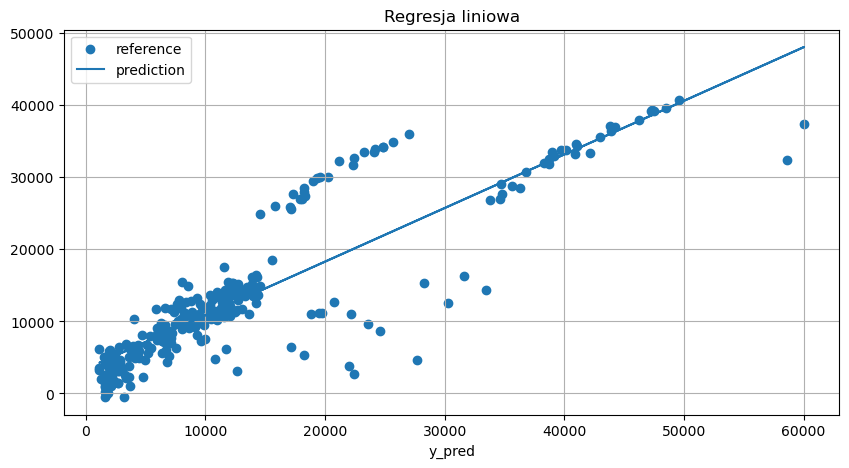

In [92]:
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)

fig = plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred, marker='o')
plt.plot(y_test, p(y_test))

plt.legend(["reference", "prediction"])
plt.title('Regresja liniowa')
plt.xlabel('y_test')
plt.xlabel('y_pred')
plt.grid()
plt.show()

## Regresja Polinominalna

In [87]:
#Zdeefiniowanie zbiórów x i y
x = df.drop(['charges', 'region'], axis=1)
y = df.charges

#Polinominal Regression
pol = PolynomialFeatures(degree = 2)
x_pol = pol.fit_transform(x)

#Podział na zbiory testowy i treningowy
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size = 0.2, random_state=1)

#Standaryzacja
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Regresja Liniowa
pr_model = LinearRegression()
pr_model.fit(x_train, y_train)
y_pred = pr_model.predict(x_test)

#Obliczenie MSE
mse_test = mean_squared_error(y_test, y_pred)

#Obliczenie R^2
r2_test = r2_score(y_test, y_pred)

print('MSE test: {:.3f}'.format(mse_test))
print('R2 test: {:.3f}'.format(r2_test))

MSE test: 21147819.565
R2 test: 0.858


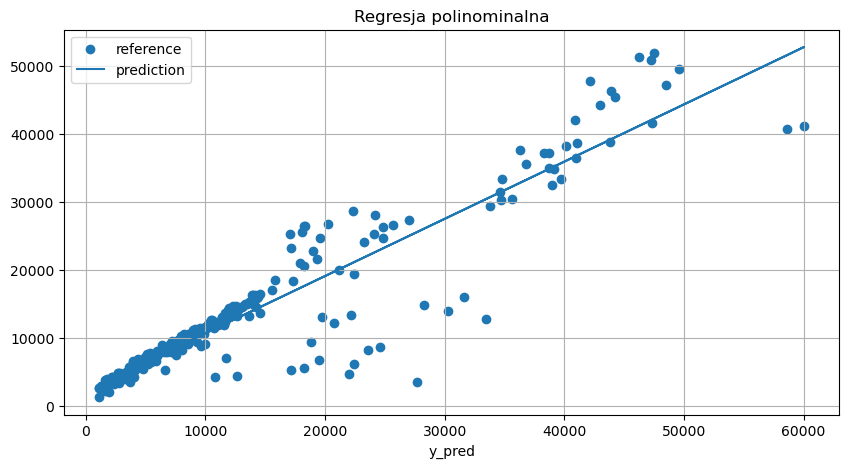

In [88]:
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)

fig = plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred, marker='o')
plt.plot(y_test, p(y_test))

plt.legend(["reference", "prediction"])
plt.title('Regresja polinominalna')
plt.xlabel('y_test')
plt.xlabel('y_pred')
plt.grid()
plt.show()

## Regresja Polinominalna + PCA

In [83]:
#Zdeefiniowanie zbiórów x i y
x = df.drop(['charges', 'region'], axis=1)
y = df.charges

#Polinominal Regression
pol = PolynomialFeatures(degree = 2)
x_pol = pol.fit_transform(x)

#Podział na zbiory testowy i treningowy
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size = 0.2, random_state=1)

#Standaryzacja
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
    
#PCA
pca = PCA(0.95)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
print("number of principal components = {}".format(pca.n_components_))

#Regresja Liniowa
lr_model = LinearRegression()
lr_model.fit(x_train_pca, y_train)
y_pred = lr_model.predict(x_test_pca)

#Obliczenie MSE
mse_test = mean_squared_error(y_test, y_pred)

#Obliczenie R^2
r2_test = r2_score(y_test, y_pred)

print('MSE test: {:.3f}'.format(mse_test))
print('R2 test: {:.3f}'.format(r2_test))

number of principal components = 7
MSE test: 31999034.046
R2 test: 0.786


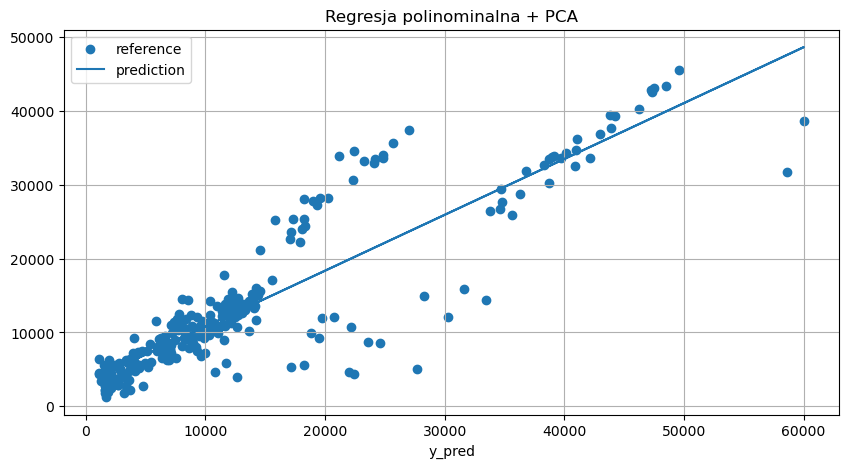

In [84]:
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)

fig = plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred, marker='o')
plt.plot(y_test, p(y_test))

plt.legend(["reference", "prediction"])
plt.title('Regresja polinominalna + PCA')
plt.xlabel('y_test')
plt.xlabel('y_pred')
plt.grid()
plt.show()